**THEORY**

Question 1
Fundamental idea behind ensemble techniques & Bagging vs Boosting
Ensemble learning combines multiple machine learning models to produce a stronger and more accurate model than any individual model. The key idea is that different models may make different errors, and combining them can reduce overall error and improve generalization.
Bagging (Bootstrap Aggregating) focuses on reducing variance. It trains multiple models independently on different bootstrapped samples of the dataset and combines their predictions using averaging or voting.
Boosting focuses on reducing bias. Models are trained sequentially, where each new model gives more importance to the samples that were misclassified by previous models. The final prediction is a weighted combination of all models.

Question 2
How Random Forest reduces overfitting
Random Forest reduces overfitting by combining multiple decision trees and averaging their predictions. Unlike a single decision tree, it introduces randomness in two ways:
Bootstrap sampling : each tree is trained on a random subset of data.
Feature randomness : each split considers only a random subset of features.
Two important hyperparameters:
n_estimators: Number of trees in the forest (more trees → better stability).
max_features: Controls how many features are considered at each split, reducing correlation between trees.

Question 3
What is Stacking?
Stacking is an ensemble method where predictions from multiple base models are used as inputs to a meta-model, which learns how to best combine them.
Unlike bagging or boosting:
Bagging averages similar models
Boosting trains models sequentially
Stacking learns the combination strategy
Example:
Using Logistic Regression, Random Forest, and SVM as base models, and Logistic Regression as the meta-model for fraud detection.

Question 4
OOB Score in Random Forest
Out-of-Bag (OOB) Score uses the samples not selected during bootstrap sampling to evaluate model performance.
Why useful:
No need for a separate validation set
Saves data
Provides an unbiased estimate of model performance

Question 5
AdaBoost vs Gradient Boosting (Explanation Form)
AdaBoost increases the weights of misclassified samples so that future models focus more on them. Gradient Boosting fits new models to the residual errors of previous models using gradient descent. AdaBoost is faster and simpler, while Gradient Boosting is more flexible and powerful for complex data.

Question 6
Why CatBoost handles categorical features well
CatBoost uses ordered target encoding, preventing data leakage. It converts categorical values into numerical statistics based on historical target values and applies permutations to avoid overfitting. This removes the need for one-hot encoding.

In [1]:
#7
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Load data
X, y = load_wine(return_X_y=True)

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# KNN without scaling
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print("Unscaled Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Scaling
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

knn.fit(X_train_s, y_train)
y_pred_s = knn.predict(X_test_s)

print("Scaled Accuracy:", accuracy_score(y_test, y_pred_s))

# GridSearch
param_grid = {
    'n_neighbors': range(1, 21),
    'metric': ['euclidean', 'manhattan']
}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid.fit(X_train_s, y_train)

best_knn = grid.best_estimator_
y_best = best_knn.predict(X_test_s)

print("Optimized Accuracy:", accuracy_score(y_test, y_best))


Unscaled Accuracy: 0.7407407407407407
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        19
           1       0.75      0.71      0.73        21
           2       0.53      0.57      0.55        14

    accuracy                           0.74        54
   macro avg       0.73      0.73      0.73        54
weighted avg       0.74      0.74      0.74        54

Scaled Accuracy: 0.9629629629629629
Optimized Accuracy: 0.9629629629629629


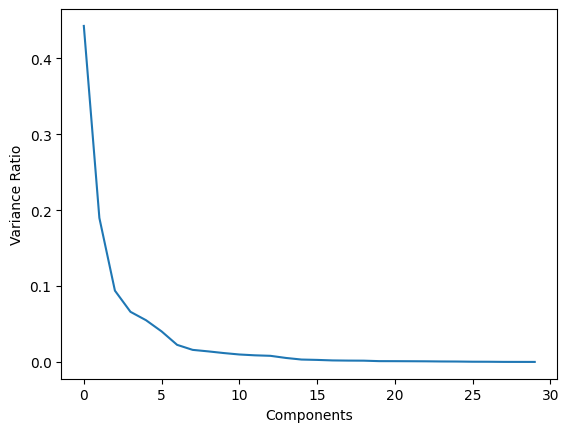

Original Accuracy: 0.9806678383128296
PCA Accuracy: 0.9753954305799648


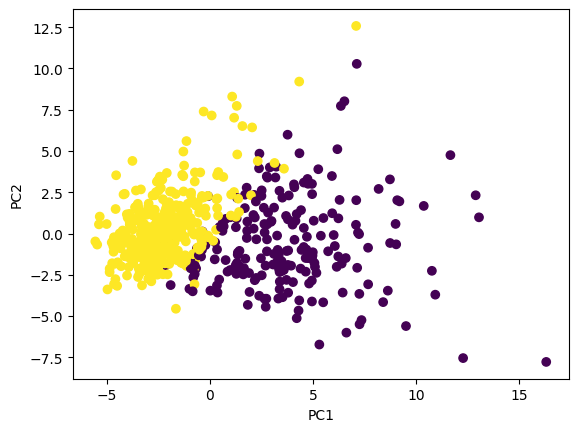

In [2]:
#8
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

X, y = load_breast_cancer(return_X_y=True)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

plt.plot(pca.explained_variance_ratio_)
plt.xlabel("Components")
plt.ylabel("Variance Ratio")
plt.show()

pca95 = PCA(n_components=0.95)
X_pca95 = pca95.fit_transform(X_scaled)

knn = KNeighborsClassifier()
knn.fit(X_scaled, y)
print("Original Accuracy:", knn.score(X_scaled, y))

knn.fit(X_pca95, y)
print("PCA Accuracy:", knn.score(X_pca95, y))

plt.scatter(X_pca[:,0], X_pca[:,1], c=y)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


euclidean MSE: 3103.699882259301
manhattan MSE: 3675.2741541435325


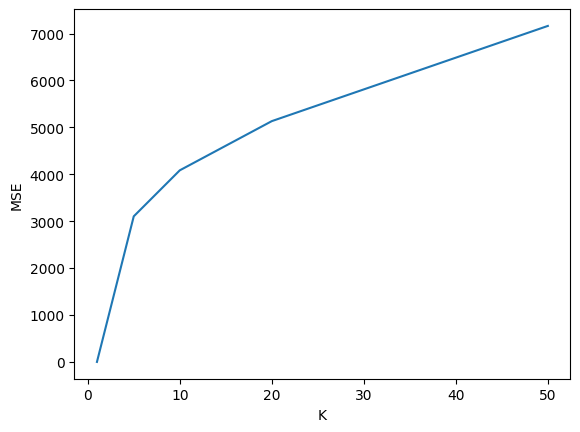

In [3]:
#9
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

X, y = make_regression(n_samples=500, n_features=10, noise=10, random_state=42)

for metric in ['euclidean', 'manhattan']:
    knn = KNeighborsRegressor(n_neighbors=5, metric=metric)
    knn.fit(X, y)
    y_pred = knn.predict(X)
    print(metric, "MSE:", mean_squared_error(y, y_pred))

ks = [1,5,10,20,50]
mse = []

for k in ks:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X, y)
    mse.append(mean_squared_error(y, knn.predict(X)))

plt.plot(ks, mse)
plt.xlabel("K")
plt.ylabel("MSE")
plt.show()


In [4]:
#10
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import time

df = pd.read_csv(
    "https://raw.githubusercontent.com/MasteriNeuron/datasets/main/diabetes.csv"
)

X = df.drop("Outcome", axis=1)
y = df["Outcome"]

imputer = KNNImputer()
X = imputer.fit_transform(X)

methods = ['brute', 'kd_tree', 'ball_tree']

for m in methods:
    start = time.time()
    knn = KNeighborsClassifier(algorithm=m)
    knn.fit(X, y)
    acc = accuracy_score(y, knn.predict(X))
    print(m, "Accuracy:", acc, "Time:", time.time()-start)


brute Accuracy: 0.8033854166666666 Time: 0.010575294494628906
kd_tree Accuracy: 0.8033854166666666 Time: 0.011006832122802734
ball_tree Accuracy: 0.8033854166666666 Time: 0.014686346054077148
